# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel


In [2]:
import sklearn
sklearn.__version__


'0.23.1'

# Import dataset and visualization

In [3]:
data=pd.read_csv("DB.csv")
data.head
data.tail

<bound method NDFrame.tail of      preg   plas  pres  Skin   test  mass   pedi  age  class
0       6    148    72     35     0  33.6  0.627   50      1
1       1     85    66     29     0  26.6  0.351   31      0
2       8    183    64      0     0  23.3  0.672   32      1
3       1     89    66     23    94  28.1  0.167   21      0
4       0    137    40     35   168  43.1  2.288   33      1
..    ...    ...   ...    ...   ...   ...    ...  ...    ...
763    10    101    76     48   180  32.9  0.171   63      0
764     2    122    70     27     0  36.8  0.340   27      0
765     5    121    72     23   112  26.2  0.245   30      0
766     1    126    60      0     0  30.1  0.349   47      1
767     1     93    70     31     0  30.4  0.315   23      0

[768 rows x 9 columns]>

# Taking care of missing values

In [25]:
data.isnull().any()


preg     False
 plas    False
pres     False
Skin     False
test     False
mass     False
pedi     False
age      False
class    False
dtype: bool

In [5]:
type(data)

pandas.core.frame.DataFrame

# Seperate input and output values

In [6]:
x=data.iloc[:,0:8].values
x


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [7]:
y=data.iloc[:,-1].values

In [8]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
labels=['preg','plas','pres','Skin','test','mass','pedi','age']

# Seperate Training and testing values

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
x_train.shape

(576, 8)

In [12]:
y_train.shape

(576,)

# Model building 

Decision tree classifier


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0,criterion="entropy")
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
for feature in zip(labels,dt.feature_importances_):
    print(feature)
  

('preg', 0.05983589995082879)
('plas', 0.20958617706205732)
('pres', 0.10914484984970281)
('Skin', 0.0340733980812645)
('test', 0.06092186086751101)
('mass', 0.25654064257766795)
('pedi', 0.1697202542653195)
('age', 0.10017691734564821)


# Evaluation

In [15]:
y_pred=dt.predict(x_test)
y_pred


array([1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[105,  25],
       [ 18,  44]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)


'              precision    recall  f1-score   support\n\n           0       0.85      0.81      0.83       130\n           1       0.64      0.71      0.67        62\n\n    accuracy                           0.78       192\n   macro avg       0.75      0.76      0.75       192\nweighted avg       0.78      0.78      0.78       192\n'

In [19]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.027218098267939195

# Accuracy score

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7760416666666666

# AUC-ROC curve

In [21]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)

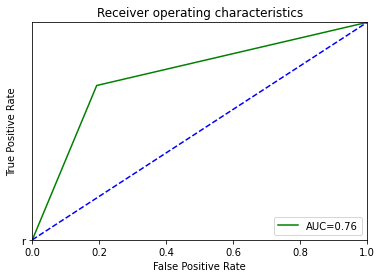

In [24]:
plt.title('Receiver operating characteristics')
plt.plot(fpr,tpr,'g',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()